<p style="font-family:Arial; font-size:36px;color:green;text-align:center;">
    Weather Data Clustering Using k-means<br>
    <br>
    </p>

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import utils
import pandas as pd
import numpy as np
from itertools import cycle, islice
from matplotlib import pyplot as plt
from pandas.tools.plotting import parallel_coordinates

%matplotlib inline

In [2]:
data = pd.read_csv('./weather/minute_weather.csv')

In [3]:
data.shape

(1587257, 13)

In [4]:
data.head(5)

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8


In [5]:
data.columns

Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'rain_accumulation', 'rain_duration', 'relative_humidity'],
      dtype='object')

In [6]:
sample_df = data[(data['rowID'] % 10) == 0]
sample_df.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
10,10,2011-09-10 00:10:49,912.3,62.24,144.0,1.2,167.0,1.8,115.0,0.6,0.0,0.0,38.5
20,20,2011-09-10 00:20:49,912.2,63.32,100.0,2.0,122.0,2.5,91.0,1.5,0.0,0.0,58.3
30,30,2011-09-10 00:30:49,912.2,62.60,91.0,2.0,103.0,2.4,71.0,1.4,0.0,0.0,57.9
40,40,2011-09-10 00:40:49,912.2,64.04,81.0,2.6,88.0,2.9,68.0,1.4,0.0,0.0,57.4


In [8]:
sample_df.shape

(158726, 13)

In [9]:
type(sample_df)

pandas.core.frame.DataFrame

In [13]:
sample_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rowID,158726.0,793625.000000,458203.937509,0.00,396812.5,793625.00,1190437.50,1587250.00
air_pressure,158726.0,916.830161,3.051717,905.00,914.8,916.70,918.70,929.50
air_temp,158726.0,61.851589,11.833569,31.64,52.7,62.24,70.88,99.50
avg_wind_direction,158680.0,162.156100,95.278201,0.00,62.0,182.00,217.00,359.00
avg_wind_speed,158680.0,2.775215,2.057624,0.00,1.3,2.20,3.80,31.90
max_wind_direction,158680.0,163.462144,92.452139,0.00,68.0,187.00,223.00,359.00
max_wind_speed,158680.0,3.400558,2.418802,0.10,1.6,2.70,4.60,36.00
min_wind_direction,158680.0,166.774017,97.441109,0.00,76.0,180.00,212.00,359.00
min_wind_speed,158680.0,2.134664,1.742113,0.00,0.8,1.60,3.00,31.60
rain_accumulation,158725.0,0.000318,0.011236,0.00,0.0,0.00,0.00,3.12


In [14]:
sample_df[sample_df['rain_accumulation'] == 0].shape

(157812, 13)

In [15]:
sample_df[sample_df['rain_duration'] == 0].shape

(157237, 13)

In [16]:
del sample_df['rain_accumulation']
del sample_df['rain_duration']

In [19]:
sample_df.shape

(158726, 11)

In [23]:
rows_before = sample_df.shape[0]
sample_df = sample_df.dropna()
rows_after = sample_df.shape[0]

In [24]:
rows_before

158726

In [25]:
rows_after

158680

In [26]:
sample_df.columns

Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'relative_humidity'],
      dtype='object')

In [32]:
features = ['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed', 'max_wind_speed', 'max_wind_direction',
           'relative_humidity']

In [33]:
select_df = sample_df[features]
select_df.head()

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_speed,max_wind_direction,relative_humidity
0,912.3,64.76,97.0,1.2,1.6,106.0,60.5
10,912.3,62.24,144.0,1.2,1.8,167.0,38.5
20,912.2,63.32,100.0,2.0,2.5,122.0,58.3
30,912.2,62.60,91.0,2.0,2.4,103.0,57.9
40,912.2,64.04,81.0,2.6,2.9,88.0,57.4


In [34]:
x = StandardScaler().fit_transform(select_df)
x

array([[-1.48456281,  0.24544455, -0.68385323, ..., -0.74440309,
        -0.62153592,  0.49233835],
       [-1.48456281,  0.03247142, -0.19055941, ..., -0.66171726,
         0.03826701, -0.34710804],
       [-1.51733167,  0.12374562, -0.65236639, ..., -0.37231683,
        -0.44847286,  0.40839371],
       ..., 
       [-0.30488381,  1.15818654,  1.90856325, ..., -0.70306017,
         2.0393087 ,  0.01538018],
       [-0.30488381,  1.12776181,  2.06599745, ..., -0.74440309,
        -1.67073075, -0.04948614],
       [-0.30488381,  1.09733708, -1.63895404, ..., -0.62037434,
        -1.55174989, -0.05711747]])

In [35]:
kmeans = KMeans(n_clusters=12)
model = kmeans.fit(x)

In [36]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=12, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [37]:
model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=12, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [38]:
centers = model.cluster_centers_
centers

array([[-1.18250526, -0.870469  ,  0.44688125,  1.98314596,  1.94404955,
         0.53837217,  0.90883808],
       [-0.21055439,  0.6330789 ,  0.40856917,  0.73359542,  0.67175466,
         0.51674121, -0.15171463],
       [-0.83790332, -1.20123662,  0.37555238,  0.36931133,  0.35726783,
         0.47401457,  1.36262794],
       [ 1.36768818, -0.08151489, -1.20649644, -0.0510817 , -0.03084637,
        -1.07519624, -0.97766689],
       [ 1.19007801, -0.25468312, -1.15493166,  2.12261318,  2.23936256,
        -1.0534084 , -1.13456932],
       [ 0.24463799, -0.99618746,  0.65805408, -0.54707845, -0.52984474,
         0.8478233 ,  1.16129529],
       [-0.7065958 ,  0.53374882,  0.17516434, -0.58436054, -0.59780203,
         0.34479277, -0.10742667],
       [ 0.13262266,  0.84100449,  1.41242073, -0.6382135 , -0.58900661,
         1.67658107, -0.71382497],
       [ 0.06113923, -0.78891905, -1.19730343, -0.5707786 , -0.58536331,
        -1.0433185 ,  0.87915471],
       [ 0.23405125,  0.3206

In [58]:
# Function that creates a DataFrame with a column for Cluster Number

def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')

	# Zip with a column called 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas data frame for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

In [64]:
# Function that creates Parallel Plots

def parallel_plot(data):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
	parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [65]:
P = pd_centers(features,centers)

C:\Users\grima\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.
  


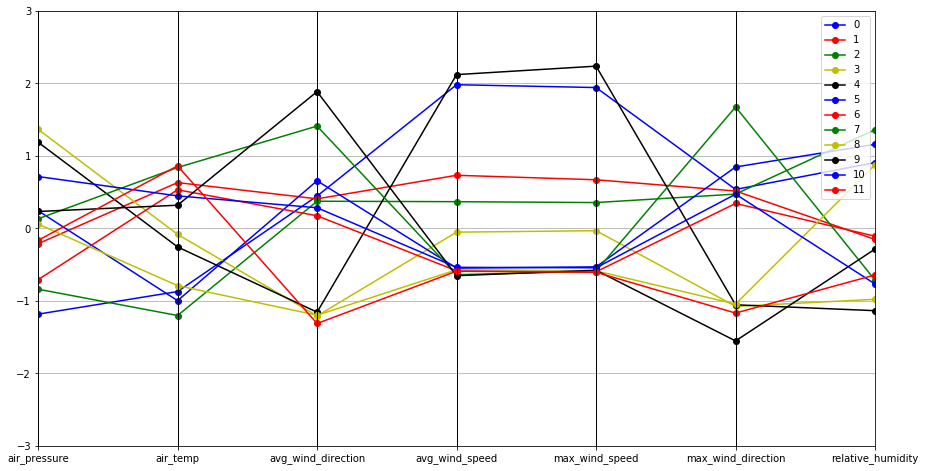

In [68]:
parallel_plot(P)